# Análise do Dataset Google Play Store

Este notebook apresenta uma análise do dataset da Google Play Store, que contém informações detalhadas sobre aplicativos, como categorias, avaliações, número de instalações e preços.

### Objetivos:
1. Explorar o dataset e entender a distribuição dos dados.
2. Realizar limpeza e ajustes para preparar os dados para análise.
3. Obter insights sobre:
    - Avaliações dos aplicativos.
    - Proporção entre aplicativos gratuitos e pagos.
    - Distribuição de categorias.

### Estrutura:
O notebook está dividido em seis etapas principais:
1. Introdução.
2. Carregamento do dataset.
3. Limpeza e preparação dos dados.
4. Análise exploratória.
5. Visualizações.
6. Conclusões.


O dataset foi carregado utilizando a biblioteca pandas. Nesta etapa, foi feita uma inspeção inicial dos dados para entender:

    A estrutura do dataset.
    As colunas disponíveis.
    A existência de valores ausentes e inconsistências.

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np

# Carregando o dataset
file_path = "googleplaystore.csv"  # Substitua pelo caminho correto do arquivo
df = pd.read_csv(file_path)

# Visualizando as primeiras linhas do dataset
print(df.head(10))

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1

Aqui, os dados foram preparados para análise. Esta etapa incluiu:

    Remoção de valores ausentes.
    Conversão de colunas com caracteres especiais (Installs, Price) para tipos numéricos.
    Tratamento de inconsistências, como valores duplicados ou formatos incorretos.

Principais Ações:

    Limpeza da coluna Installs:
        Remoção de caracteres especiais (+ e ,) e conversão para números inteiros.

    Filtragem de Linhas Inválidas:
        Retiramos linhas em que o valor de Installs não era numérico.

    Conversão de Tipos:
        Colunas como Price foram convertidas para float, removendo o caractere $.

In [2]:
#Verificando valores únicos na coluna 'Installs'
print("Valores únicos em 'Installs':")
print(df['Installs'].unique())

# Filtrando apenas as linhas onde 'Installs' contém números válidos (começando com dígitos)
df = df[df['Installs'].str.contains(r'^\d', na=False)]

# Removendo os caracteres ',' e '+' e convertendo para inteiro
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Verificando os valores únicos após a limpeza
print("\nValores únicos após a limpeza:")
print(df['Installs'].unique())

Valores únicos em 'Installs':
['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']

Valores únicos após a limpeza:
[     10000     500000    5000000   50000000     100000      50000
    1000000   10000000       5000  100000000 1000000000       1000
  500000000         50        100        500         10          1
          5          0]


In [3]:
len(df)

10840

In [4]:
# Removendo linhas duplicadas
df.drop_duplicates(inplace=True)

# Verificando o número de linhas após a remoção de duplicados
print(f"Número de linhas após remoção de duplicados: {len(df)}")

Número de linhas após remoção de duplicados: 10357


Nesta etapa, foram feitas análises para obter informações gerais e métricas importantes sobre os dados.
Exemplos:

    Top 5 Aplicativos Mais Instalados:
        Identificamos os aplicativos com o maior número de instalações.

    Proporção de Aplicativos Gratuitos x Pagos:
        Calculamos o total de aplicativos gratuitos e pagos no dataset.

    Média de Avaliações por Categoria:
        Agrupamos os aplicativos por categoria para calcular a média de reviews.

In [6]:
import pandas as pd

# Carregando o dataset
file_path = "googleplaystore.csv" 
df = pd.read_csv(file_path)

# Garantir que a coluna 'Installs' é do tipo string
df['Installs'] = df['Installs'].astype(str)

# Filtrando apenas as linhas com valores numéricos válidos em 'Installs'
df = df[df['Installs'].str.contains(r'^\d', na=False)]

# Limpando a coluna 'Installs' para remover ',' e '+' e convertendo para inteiro
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Recalculando o Top 5 aplicativos por número de instalações
top_5_installs_corrected = df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(5)

# Exibindo os resultados corrigidos
print("Top 5 aplicativos por número de instalações corrigido:")
print(top_5_installs_corrected)


Top 5 aplicativos por número de instalações corrigido:
                            App    Installs
2808              Google Photos  1000000000
2853              Google Photos  1000000000
3223  Maps - Navigate & Explore  1000000000
3117  Maps - Navigate & Explore  1000000000
3234                     Google  1000000000


In [7]:
# Remover duplicatas baseadas na coluna 'App'
df_unique = df.drop_duplicates(subset='App', keep='first')

# Recalculando o Top 5 aplicativos por número de instalações
top_5_installs_corrected = df_unique[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(5)

# Exibindo os resultados corrigidos
print("Top 5 aplicativos por número de instalações corrigido (sem duplicatas):")
print(top_5_installs_corrected)


Top 5 aplicativos por número de instalações corrigido (sem duplicatas):
                    App    Installs
3736        Google News  1000000000
2554            Google+  1000000000
1654     Subway Surfers  1000000000
152   Google Play Books  1000000000
3665            YouTube  1000000000


Nesta etapa, foram criados gráficos para facilitar a interpretação dos resultados. Utilizamos a biblioteca matplotlib para gerar visualizações como:
Exemplos de Gráficos:

    Gráfico de Barras: Top 5 Aplicativos por Número de Instalações:
        Mostra os aplicativos mais populares com base no número de downloads.

    Gráfico de Dispersão: Relação entre Installs e Reviews:
        Exibe a relação entre o número de instalações e o número de reviews para entender padrões de popularidade.

    Gráfico de Pizza: Proporção de Aplicativos Gratuitos x Pagos:
        Visualiza a distribuição dos tipos de aplicativos.

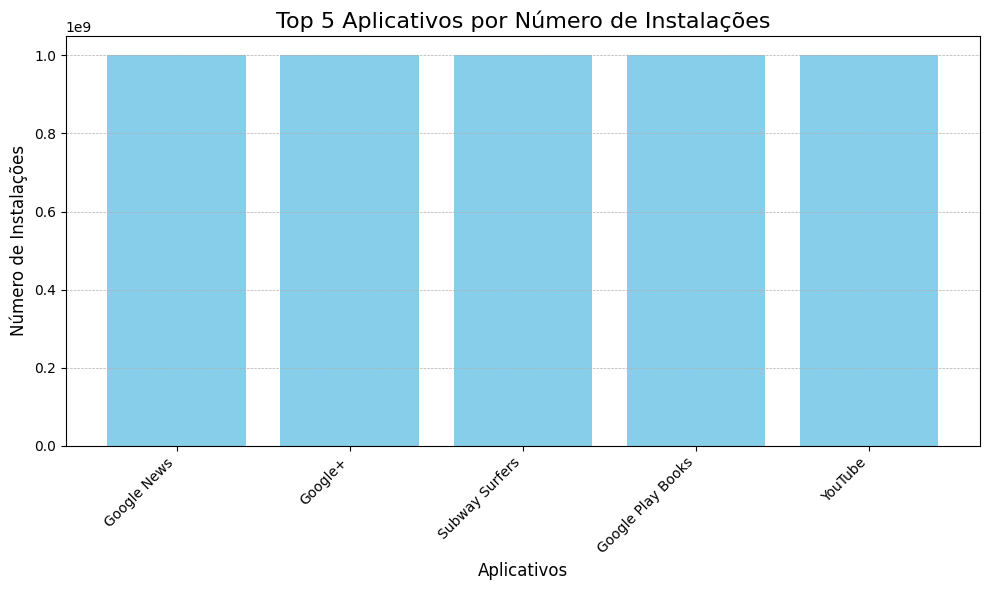

In [8]:
import matplotlib.pyplot as plt

# Dados para o gráfico
apps = top_5_installs_corrected['App']
installs = top_5_installs_corrected['Installs']

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(apps, installs, color='skyblue')
plt.title("Top 5 Aplicativos por Número de Instalações", fontsize=16)
plt.xlabel("Aplicativos", fontsize=12)
plt.ylabel("Número de Instalações", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


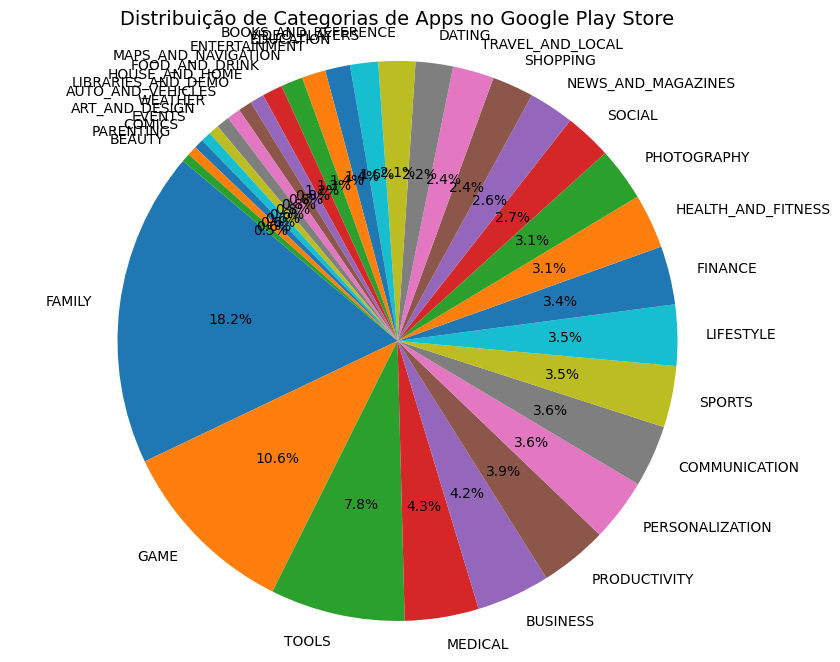

In [10]:
import matplotlib.pyplot as plt

# Contando a frequência de cada categoria
category_counts = df['Category'].value_counts()

# Criando o gráfico de pizza para as categorias
plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Categorias de Apps no Google Play Store', fontsize=14)
plt.axis('equal')  # Para garantir que o gráfico fique em formato circular
plt.show()


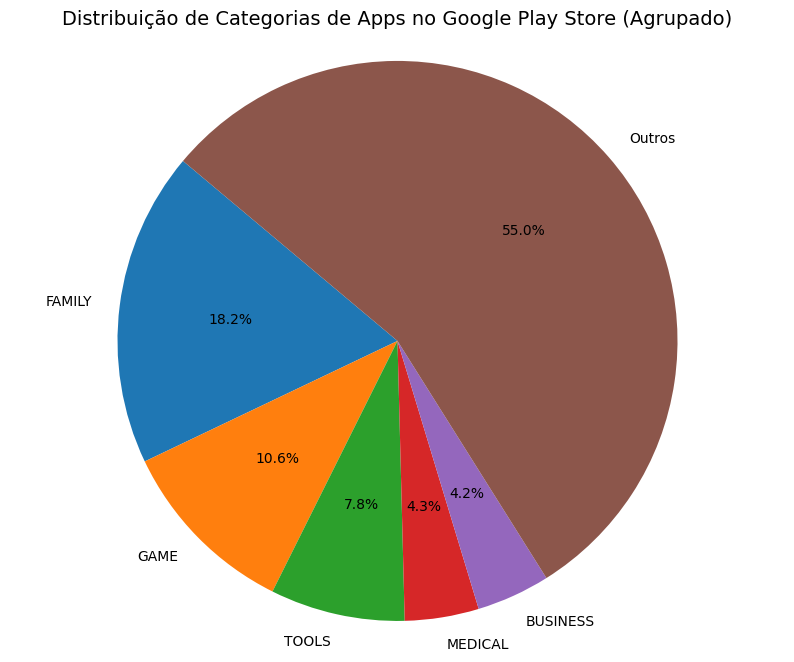

In [11]:
import matplotlib.pyplot as plt

# Contando a frequência de cada categoria
category_counts = df['Category'].value_counts()

# Definindo um limite para categorias a serem exibidas separadamente
limite = 5  # Exibir apenas as 5 categorias mais frequentes
categories_to_plot = category_counts.head(limite)
other_categories = category_counts[limite:].sum()

# Adicionando a categoria "Outros"
categories_to_plot['Outros'] = other_categories

# Criando o gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(categories_to_plot, labels=categories_to_plot.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Categorias de Apps no Google Play Store (Agrupado)', fontsize=14)
plt.axis('equal')  # Para garantir que o gráfico fique circular
plt.show()


In [13]:
# Garantindo que a coluna 'Price' seja do tipo string e tratando valores nulos
df['Price'] = df['Price'].fillna('0').astype(str)

# Removendo o símbolo de dólar e convertendo para float
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

# Identificando o app mais caro
most_expensive_app = df.loc[df['Price'].idxmax()]

# Exportando o resultado para um arquivo TXT no diretório atual
output_file = 'most_expensive_app.txt'
with open(output_file, 'w') as file:
    file.write("App mais caro no dataset:\n")
    file.write(f"Nome: {most_expensive_app['App']}\n")


print(f"Arquivo exportado com sucesso: {output_file}")


Arquivo exportado com sucesso: most_expensive_app.txt


In [14]:
# Contando o número de apps classificados como "Mature 17+"
mature_17_plus_count = df[df['Content Rating'] == 'Mature 17+'].shape[0]

# Exibindo o resultado
print(f"Quantidade de apps classificados como 'Mature 17+': {mature_17_plus_count}")

Quantidade de apps classificados como 'Mature 17+': 499


In [15]:
# Convertendo a coluna 'Reviews' para valores numéricos (inteiros)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Removendo linhas onde 'Reviews' seja NaN
df = df.dropna(subset=['Reviews'])

# Convertendo a coluna 'Reviews' para inteiro (após remoção de NaN)
df['Reviews'] = df['Reviews'].astype(int)

# Selecionando os top 10 apps por número de reviews
top_10_reviews = df.nlargest(10, 'Reviews')[['App', 'Reviews']]

# Exibindo o resultado
print("Top 10 apps por número de reviews:")
print(top_10_reviews)


Top 10 apps por número de reviews:
                                           App   Reviews
2544                                  Facebook  78158306
3943                                  Facebook  78128208
336                         WhatsApp Messenger  69119316
381                         WhatsApp Messenger  69119316
3904                        WhatsApp Messenger  69109672
2604                                 Instagram  66577446
2545                                 Instagram  66577313
2611                                 Instagram  66577313
3909                                 Instagram  66509917
382   Messenger – Text and Video Chat for Free  56646578


In [16]:
# Garantindo que estamos lidando com valores únicos por App
# Selecionando os top 10 apps únicos por número de reviews
top_10_reviews_unique = (
    df.sort_values('Reviews', ascending=False)
    .drop_duplicates(subset=['App'])
    .head(10)[['App', 'Reviews']]
)

# Exibindo o resultado completo
print("Top 10 apps por número de reviews (sem duplicatas):")
print(top_10_reviews_unique)


Top 10 apps por número de reviews (sem duplicatas):
                                                    App   Reviews
2544                                           Facebook  78158306
381                                  WhatsApp Messenger  69119316
2604                                          Instagram  66577446
382            Messenger – Text and Video Chat for Free  56646578
1879                                     Clash of Clans  44893888
4005            Clean Master- Space Cleaner & Antivirus  42916526
1917                                     Subway Surfers  27725352
3665                                            YouTube  25655305
7536  Security Master - Antivirus, VPN, AppLock, Boo...  24900999
1878                                       Clash Royale  23136735


In [17]:
# Cálculo 1: Top 5 categorias por número médio de reviews (formato de lista)
top_5_categories_reviews = (
    df.groupby('Category')['Reviews']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

# Cálculo 2: Total de aplicativos gratuitos no dataset (formato de valor)
total_free_apps = df[df['Type'] == 'Free'].shape[0]

# Exibindo os resultados
print("Top 5 categorias por número médio de reviews:")
print(top_5_categories_reviews)
print("\nTotal de aplicativos gratuitos no dataset:")
print(total_free_apps)


Top 5 categorias por número médio de reviews:
Category
COMMUNICATION    2.107138e+06
SOCIAL           2.105903e+06
GAME             1.385859e+06
PHOTOGRAPHY      6.373631e+05
VIDEO_PLAYERS    6.307439e+05
Name: Reviews, dtype: float64

Total de aplicativos gratuitos no dataset:
10039


In [18]:
# Formatando os valores para melhor visualização
top_5_categories_reviews_formatted = top_5_categories_reviews.apply(lambda x: f"{x:,.0f} reviews")

# Exibindo os resultados formatados
print("Top 5 categorias por número médio de reviews:")
print(top_5_categories_reviews_formatted)


Top 5 categorias por número médio de reviews:
Category
COMMUNICATION    2,107,138 reviews
SOCIAL           2,105,903 reviews
GAME             1,385,859 reviews
PHOTOGRAPHY        637,363 reviews
VIDEO_PLAYERS      630,744 reviews
Name: Reviews, dtype: object


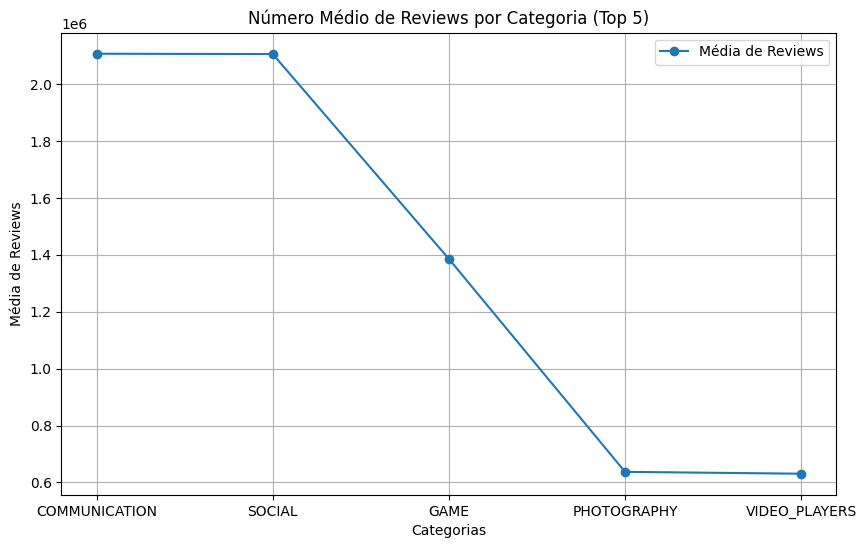

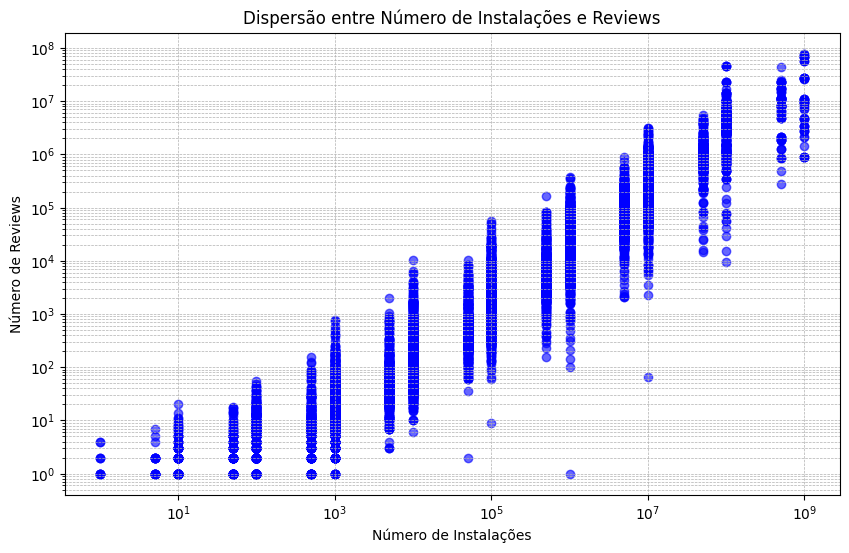

In [19]:
import matplotlib.pyplot as plt

# Usar os valores originais de top_5_categories_reviews para o gráfico
top_5_categories_reviews_values = top_5_categories_reviews.values
top_5_categories_reviews_index = top_5_categories_reviews.index

# Gráfico 1: Linha mostrando o número médio de reviews das Top 5 categorias
plt.figure(figsize=(10, 6))
plt.plot(
    top_5_categories_reviews_index,  # Índices originais
    top_5_categories_reviews_values,  # Valores numéricos originais
    marker="o",
    linestyle="-",
    label="Média de Reviews"
)
plt.title("Número Médio de Reviews por Categoria (Top 5)")
plt.xlabel("Categorias")
plt.ylabel("Média de Reviews")
plt.grid(True)
plt.legend()
plt.show()

# Gráfico 2: Dispersão entre Reviews e Installs
plt.figure(figsize=(10, 6))
plt.scatter(df['Installs'], df['Reviews'], alpha=0.6, c="blue")
plt.title("Dispersão entre Número de Instalações e Reviews")
plt.xlabel("Número de Instalações")
plt.ylabel("Número de Reviews")
plt.xscale("log")
plt.yscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()
